In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install --upgrade threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv("D:\Data Science\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.rename(columns={"Annual Income (k$)":"Income",
                "Spending Score (1-100)":"Score"},inplace=True)


In [6]:
df.isnull().sum()

CustomerID    0
Genre         0
Age           0
Income        0
Score         0
dtype: int64

In [7]:
df.drop(columns=['CustomerID','Genre','Age'],inplace=True)

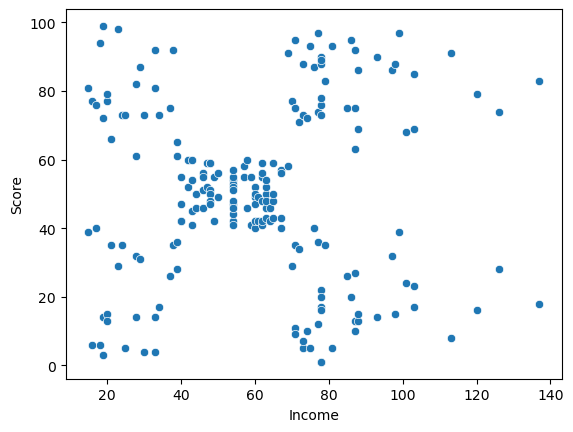

In [8]:
sns.scatterplot(x='Income',y='Score',data=df)
plt.show()

### for unsupervised machine learning,there is no output variable

In [9]:
X=df

# 1.KMeans Clustering
find the optimal number of clusters:Elbow Curve

In [10]:
wcss = []

for k in range(1,11):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters = k, init= 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(wcss)

[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37239.83554245604, 30566.45113025186, 25043.890043290045, 21826.936303231654, 19641.456216651568]


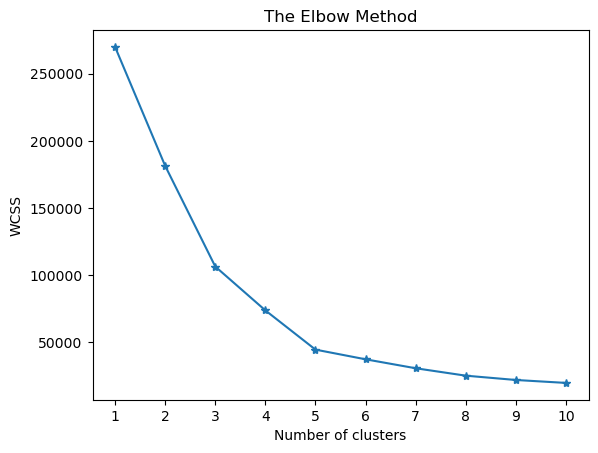

In [11]:
plt.plot(range(1,11),wcss,marker='*')
plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans=KMeans(n_clusters=5, init='k-means++',random_state=True)
X['km_cluster']=kmeans.fit_predict(X)

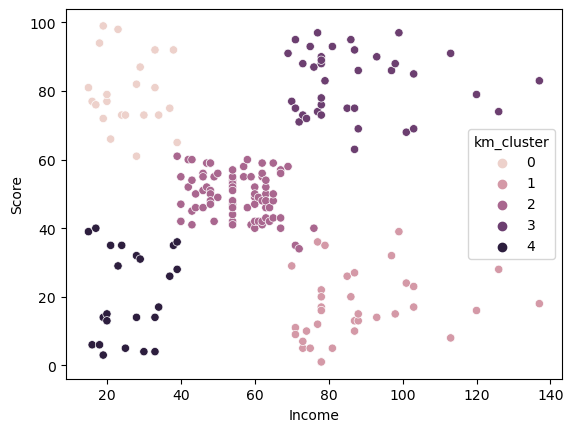

In [13]:
sns.scatterplot(x='Income',y='Score',hue='km_cluster',data=X)
plt.show()

# 2.Hierarchical Clustering
identifying the optimal number of clusters using Dendrogram

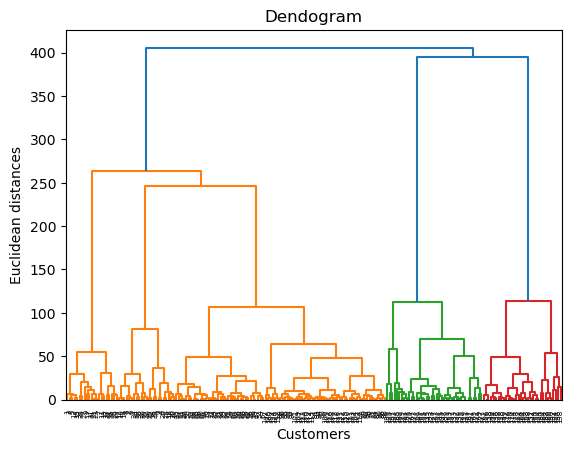

In [14]:
import scipy.cluster.hierarchy as sch

data=sch.linkage(X,method='ward')

dendogram=sch.dendrogram(data)

plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering

hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

X["h_cluster"]=hc.fit_predict(X)

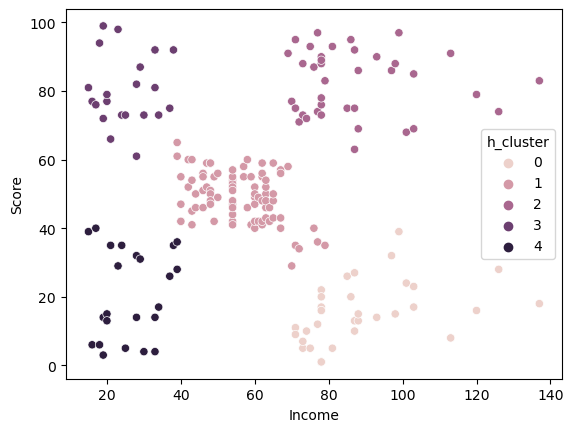

In [16]:
sns.scatterplot(x='Income',y='Score',hue='h_cluster',data=X)
plt.show()

In [17]:
for r in range(1,10):
    for m in range(3,10):
        from sklearn.cluster import DBSCAN
        dbs=DBSCAN(eps=r,min_samples=m)
        X["db_cluster"]=dbs.fit_predict(X)
        
    if X["db_cluster"].nunique()==5:
        break
print("eps:",r)
print("min:",m)

eps: 8
min: 9


In [18]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=8,min_samples=9)
X["db_cluster"]=dbs.fit_predict(X)

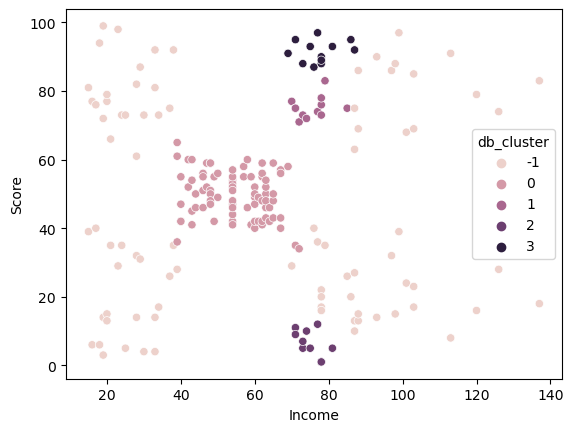

In [19]:
sns.scatterplot(x='Income',y='Score',hue="db_cluster",data=X)
plt.show()